## Pre-Process Data

In [93]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

In [94]:
train_labels = []
train_samples = []

test_labels = []
test_samples = []

In [95]:
#creating fake data for the exercise

'''an experimental drug was tested on indivisuals of age 13-100.
trial had 2100 participants. half under 65 years old and half above 65 years old.
95% participants 65 or old experienced side effects.
95% participants under 65 had no side effects.'''

# creating the training set
for i in range (50):
    random_younger  = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range (1000):
    random_younger  = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)
    
#creating the test set
for i in range (10):
    random_younger  = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range (200):
    random_younger  = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [96]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

In [97]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_train_samples = scaler.fit_transform((train_samples).reshape(-1,1))

scaled_test_samples = scaler.fit_transform((test_samples).reshape(-1,1))

C:\Users\HACK\Anaconda2\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


## Model

In [98]:
#import requirements
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [99]:
#create model
model = Sequential([
    Dense(16,input_shape = (1,), activation = 'relu'),
    Dense(32,activation = 'relu'),
    Dense(2,activation = 'softmax')
])

In [100]:
#model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_29 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_30 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [101]:
#compile model
model.compile(Adam(lr = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [102]:
#train the model
model.fit(scaled_train_samples, train_labels, validation_split = 0.1, batch_size =  10, epochs = 20, shuffle = True, verbose = 2)

Train on 1890 samples, validate on 210 samples
Epoch 1/20
 - 2s - loss: 0.6369 - acc: 0.6259 - val_loss: 0.5132 - val_acc: 0.8619
Epoch 2/20
 - 1s - loss: 0.4422 - acc: 0.8624 - val_loss: 0.2888 - val_acc: 0.9190
Epoch 3/20
 - 1s - loss: 0.3307 - acc: 0.9180 - val_loss: 0.1967 - val_acc: 1.0000
Epoch 4/20
 - 1s - loss: 0.2988 - acc: 0.9323 - val_loss: 0.1560 - val_acc: 0.9905
Epoch 5/20
 - 1s - loss: 0.2863 - acc: 0.9333 - val_loss: 0.1388 - val_acc: 0.9905
Epoch 6/20
 - 1s - loss: 0.2796 - acc: 0.9386 - val_loss: 0.1300 - val_acc: 1.0000
Epoch 7/20
 - 1s - loss: 0.2758 - acc: 0.9354 - val_loss: 0.1231 - val_acc: 1.0000
Epoch 8/20
 - 1s - loss: 0.2702 - acc: 0.9365 - val_loss: 0.1242 - val_acc: 0.9905
Epoch 9/20
 - 1s - loss: 0.2687 - acc: 0.9392 - val_loss: 0.1149 - val_acc: 1.0000
Epoch 10/20
 - 1s - loss: 0.2680 - acc: 0.9354 - val_loss: 0.1117 - val_acc: 1.0000
Epoch 11/20
 - 1s - loss: 0.2659 - acc: 0.9381 - val_loss: 0.1073 - val_acc: 0.9905
Epoch 12/20
 - 1s - loss: 0.2654 - acc

In [103]:
#making predictions
predictions  = model.predict(scaled_test_samples, batch_size = 10, verbose = 0)

In [104]:
for i in predictions:
    print(i)

[0.95649844 0.04350159]
[0.03079543 0.96920455]
[0.95060617 0.04939378]
[0.01344766 0.9865523 ]
[0.93427444 0.06572557]
[0.17958571 0.8204143 ]
[0.95649844 0.04350159]
[0.02565127 0.9743488 ]
[0.95649844 0.04350159]
[0.01618514 0.9838149 ]
[0.95649844 0.04350159]
[0.02340301 0.976597  ]
[0.95649844 0.04350159]
[0.11520874 0.8847913 ]
[0.95649844 0.04350159]
[0.03693213 0.9630678 ]
[0.9545154  0.04548452]
[0.01475399 0.985246  ]
[0.95533985 0.04466013]
[0.02340301 0.976597  ]
[0.9415946  0.05840536]
[0.01775262 0.9822474 ]
[0.95649844 0.04350159]
[0.03693213 0.9630678 ]
[0.8155073  0.18449277]
[0.03693213 0.9630678 ]
[0.95533985 0.04466013]
[0.11520874 0.8847913 ]
[0.8794353  0.12056471]
[0.09738069 0.9026193 ]
[0.7748241  0.22517593]
[0.13580963 0.8641904 ]
[0.95649844 0.04350159]
[0.01618514 0.9838149 ]
[0.95649844 0.04350159]
[0.01618514 0.9838149 ]
[0.95649844 0.04350159]
[0.03693213 0.9630678 ]
[0.95649844 0.04350159]
[0.0578193 0.9421807]
[0.9415946  0.05840536]
[0.01618514 0.9838

In [105]:
#predicting clases
rounded_predictions = model.predict_classes(scaled_test_samples, batch_size = 10, verbose = 0)

In [106]:
for i in rounded_predictions:
    print(i)

0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


## Confusion Matrix

In [107]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [108]:
cm = confusion_matrix(test_labels, rounded_predictions)

In [109]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[193  17]
 [ 10 200]]


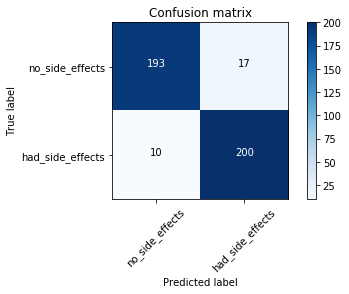

In [110]:
cm_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm, cm_labels)